## Load Data and Convert MATLAB data files to Numpy Array from S3 Storage
- This is a demonstration for how we can access our data from AWS using our data path dictionary pickle file and convert the .mat data to numpy arrays
- Option to save the numpy array data in ./source/data directory 

In [1]:
# Import libraries
import pickle
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open pickle file
path = "data/data_path_dictionary.pkl"
file_names_dict = open_pickle(path)

print("Dictionary contents: ")
file_names_dict

Dictionary contents: 


defaultdict(list,
            {'subject_data': ['svm_data/10004_08693/svm_subj_vecs.mat',
              'svm_data/10008_09924/svm_subj_vecs.mat',
              'svm_data/10009_08848/svm_subj_vecs.mat',
              'svm_data/10016_09694/svm_subj_vecs.mat',
              'svm_data/10017_08894/svm_subj_vecs.mat',
              'svm_data/10018_08907/svm_subj_vecs.mat',
              'svm_data/10021_08839/svm_subj_vecs.mat',
              'svm_data/10022_08854/svm_subj_vecs.mat',
              'svm_data/10023_09126/svm_subj_vecs.mat',
              'svm_data/10027_09455/svm_subj_vecs.mat',
              'svm_data/10033_08871/svm_subj_vecs.mat',
              'svm_data/10034_08879/svm_subj_vecs.mat',
              'svm_data/10035_08847/svm_subj_vecs.mat',
              'svm_data/10036_09800/svm_subj_vecs.mat',
              'svm_data/10037_09903/svm_subj_vecs.mat',
              'svm_data/10038_09063/svm_subj_vecs.mat',
              'svm_data/10039_08941/svm_subj_vecs.mat',
              

In [3]:
## SUBJECT DATA - one subject
# Define subject data to get from S3 - example here is grabbing the first subject
obj = file_names_dict['subject_data'][0]

# Get mat data from aws, download to temporary file then loads data, deletes temporary file.
mat_data = access_load_data(obj)
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb 23 06:31:07 2022',
 '__version__': '1.0',
 '__globals__': [],
 'run_04_vec': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 'run_03_vec': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 'run_02_vec': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
 'run_01_vec': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 

In [4]:
##LABEL DATA
# Define object data to get from S3, create file path to download LABELS

obj = file_names_dict['labels'][0]
label_data = access_load_data(obj)
label_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb 23 10:28:26 2022',
 '__version__': '1.0',
 '__globals__': [],
 'decrease_onsets': array([[ 24,  48,  60,  72,  96, 132]], dtype=uint8),
 'increase_onsets': array([[  0,  12,  36,  84, 108, 120]], dtype=uint8),
 'rest_ons': array([[  8,  20,  32,  44,  56,  68,  80,  92, 104, 116, 128, 140]],
       dtype=uint8),
 'rt_labels': array([[9999],
        [9999],
        [9999],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [9999],
        [9999],
        [9999],
        [9999],
        [9999],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [   1],
        [9999],
        [9999],
        [9999],
        [9999],
        [9999],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [   0],
        [9999],
        [9999],
        [9999],
    

### Take a look at the Training data and Labels
- our mat file is now converted to np.array.
- Reshape 2D to 4D
- need to know the x, y, z dimensions of the image to reshape

In [5]:
img_2d = mat_data['run_01_vec']
print("type: ", type(img_2d))
print(f"shape: {img_2d.shape}, time points = {img_2d.shape[0]}, x,y,z = {img_2d.shape[1]} ")
print("This data is represented as voxels by time, where x, y, z are combined")
img_2d

type:  <class 'numpy.ndarray'>
shape: (144, 592895), time points = 144, x,y,z = 592895 
This data is represented as voxels by time, where x, y, z are combined


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [6]:
rt_label = label_data['rt_labels']
print("type:", type(rt_label))
print("Label data shape: ", rt_label.shape)

type: <class 'numpy.ndarray'>
Label data shape:  (144, 1)


#### Reshape the 2d image to 4d for visualization

In [7]:
img_4d = np.reshape(img_2d,(144, 79, 95, 79))
img_4dt = img_4d.T
print("shape of transposed 4d image", img_4dt.shape)

shape of transposed 4d image (79, 95, 79, 144)


(-0.5, 94.5, 78.5, -0.5)

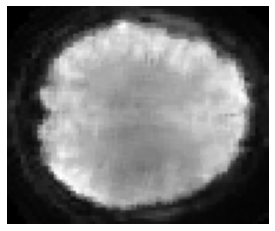

In [8]:
"Plotting the image after Converting from 2D to 4D and transposing for reshape to visualize"
layer = 50
time_point = 50
plt.imshow(img_4dt[:,:,layer, time_point], cmap = 'gray')
plt.axis('off')

### Take a look at the 4d data 
- print shapes
- reshape the 4D data into 2D array
- Depth represents slices/layers through the brain

In [9]:
height, width, depth, time_ =  img_4dt.shape
print(f"Train data shape: height {height}, width {width}, depth {depth}, time points {time_}")

Train data shape: height 79, width 95, depth 79, time points 144


In [10]:
# x, y, z of image
print("x, y, z, of the image: ", img_4dt.shape[:-1])

x, y, z, of the image:  (79, 95, 79)


In [11]:
# num time points
n_time_points = img_4dt.shape[-1]
n_time_points

144

In [12]:
# get num of voxels
num_voxels = np.prod(img_4dt.shape[:-1])
print("number of voxels: ", num_voxels)

number of voxels:  592895


In [13]:
#reshape 4d to 2d
voxels_by_time = img_4dt.reshape((n_time_points, num_voxels))
voxels_by_time

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  336,  421,  424],
       [ 336,  405,  391, ..., 1642, 1474, 1820],
       ...,
       [2208, 2231, 2210, ...,  261,  280,  256],
       [ 281,  299,  300, ...,  368,  353,  416],
       [ 447,  365,  429, ...,    0,    0,    0]], dtype=int16)

In [14]:
voxels_by_time.shape

(144, 592895)

### Save numpy image data locally

In [15]:
# Example to save first subject, run_01_vec data as a 2d numpy array in source/data folder
path = f"data/subject_{file_names_dict['subject_ID'][0]}_2d.npy"
save_data(img_2d, path)

In [16]:
# Save label data in source/data folder
path ='data/rt_label.npy'
save_data(rt_label, path)

In [17]:
# Save 4d img for visual exploratory analysis
path_4d = f"data/subject_{file_names_dict['subject_ID'][0]}_4d.npy"
save_data(img_4dt, path_4d)